# W1 - Rössler Equilibrium, Runge-Kutta, Poincare
I copied over all the necessary code from the .py files to here for ease of use.

In [1]:
import numpy as np  # Import NumPy
from scipy.integrate import odeint  # Import odeint

# Q 1.1 & 1.2 Rossler equilibria

In [76]:
# equilibrum, by hand
def solve_for_eq(a,b,c, use_abc=False):
    if use_abc:
        z = np.array([(c+np.sqrt((c**2-4*a*b)))/(2*a), (c-np.sqrt((c**2-4*a*b)))/(2*a)])
        x,y = a*z,-z
    else:
        e = a/c
        print('epsilon = %.4f'%e)
        D = 1-4*e**2
        p = np.array([1+D**0.5, 1-D**0.5])/2
        z = p/e
        x,y = c*p, -z
    
    return(np.vstack((x,y,z)))

solve_for_eq(0.2, 0.2, 5.7, False)[:,1]

epsilon = 0.0351


array([ 0.0070262 , -0.03513102,  0.03513102])

# Q 1.3 Runge-Kutta

-0.8390715295257496


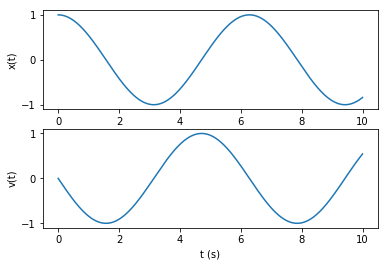

In [32]:
test_RK4()

# Q1.4 Numerically solve Rossler

(-5.577776502551634, 4.334346103045504, 0.01884457833295453)


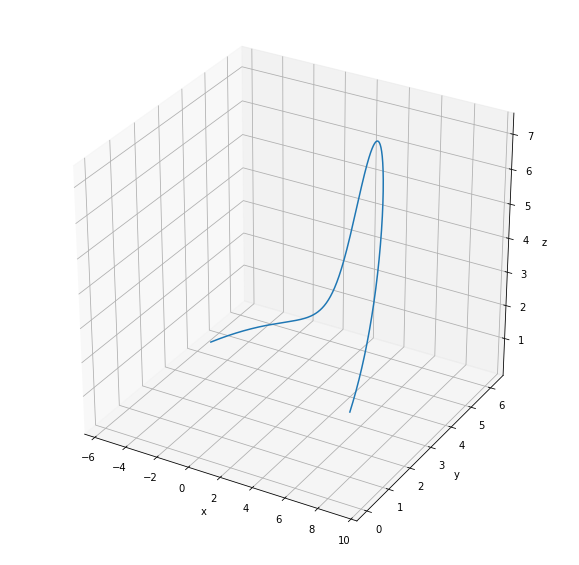

In [53]:
run_rossler(Velocity, use_rk4=True)

# Poincare map of the Rossler system

[8.38094142]


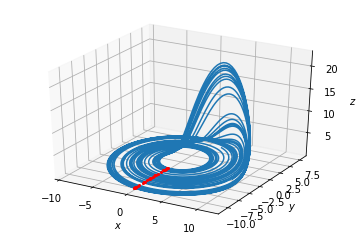

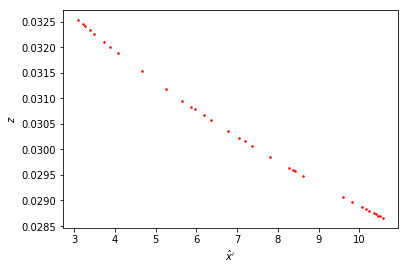

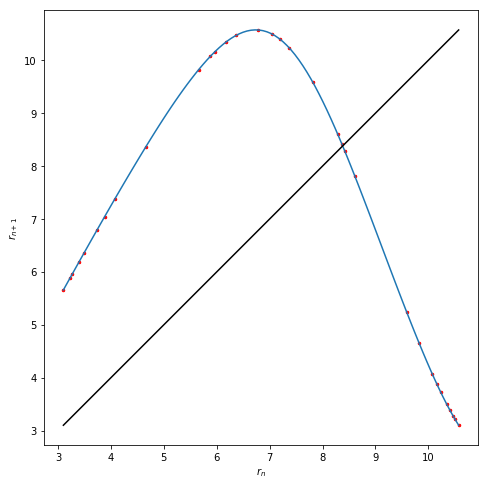

In [74]:
run_poincare()

https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#The_Runge.E2.80.93Kutta_method

In [33]:
def RK4(velocityFunction, initialCondition, timeArray):
    """
    Runge-Kutta 4 Integrator.
    Inputs:
    VelocityFunction: Function name to integrate
                      this function must have two inputs namely state space
                      vector and time. For example: velocity(ssp, t)
    InitialCondition: Initial condition, 1xd NumPy array, where d is the
                      dimension of the state space
    TimeArray: 1 x Nt NumPy array which contains instances for the solution
               to be returned.
    Outputs:
    SolutionArray: d x Nt NumPy array which contains numerical solution of the
                   ODE.
    """
    #Generate the solution array to fill in:
    SolutionArray = np.zeros((np.size(timeArray, 0),
                              np.size(initialCondition, 0)))
    #Assign the initial condition to the first element:
    SolutionArray[0, :] = initialCondition

    for i in range(0, np.size(timeArray) - 1):
        #Read time element:
        deltat = timeArray[i + 1] - timeArray[i]
        #Runge Kutta k's:
        k1 = deltat * velocityFunction(SolutionArray[i], timeArray[i])
        k2 = deltat * velocityFunction(SolutionArray[i]+k1/2, timeArray[i]+deltat/2)  # COMPLETE THIS LINE
        k3 = deltat * velocityFunction(SolutionArray[i]+k2/2, timeArray[i]+deltat/2)  # COMPLETE THIS LINE
        k4 = deltat * velocityFunction(SolutionArray[i]+k3, timeArray[i]+deltat)  # COMPLETE THIS LINE
        #Next integration step:
        SolutionArray[i + 1] = SolutionArray[i] + (k1+2*k2+2*k3+k4)/6  # COMPLETE THIS LINE
    return SolutionArray

def test_RK4():
    #This block will be evaluated if this script is called as the main routine
    #and will be ignored if this file is imported from another script.
    #
    #This is a handy structure in Python which lets us test the functions
    #in a package

    #In order to test our integration routine, we are going to define Harmonic
    #Oscillator equations in a 2D state space:
    def velocity(ssp, t):
        """
        State space velocity function for 1D Harmonic oscillator

        Inputs:
        ssp: State space vector
        ssp = (x, v)
        t: Time. It does not effect the function, but we have t as an imput so
           that our ODE would be compatible for use with generic integrators
           from scipy.integrate

        Outputs:
        vel: Time derivative of ssp.
        vel = ds sp/dt = (v, - (k/m) x)
        """
        #Parameters:
        k = 1.0
        m = 1.0
        #Read inputs:
        x, v = ssp  # Read x and v from ssp vector
        #Construct velocity vector and return it:
        vel = np.array([v, - (k / m) * x], float)
        return vel

    #Generate an array of time points for which we will compute the solution:
    tInitial = 0
    tFinal = 10
    Nt = 1000  # Number of points time points in the interval tInitial, tFinal
    tArray = np.linspace(tInitial, tFinal, Nt)

    #Initial condition for the Harmonic oscillator:
    ssp0 = np.array([1.0, 0], float)

    #Compute the solution using Runge-Kutta routine:
    sspSolution = RK4(velocity, ssp0, tArray)

    #from scipy.integrate import odeint
    #sspSolution = odeint(velocity, ssp0, tArray)
    xSolution = sspSolution[:, 0]
    vSolution = sspSolution[:, 1]

    print(xSolution[-1])

    #Import functions which we need for plotting our results:
    from pylab import subplot, plot, xlabel, ylabel, show

    subplot(2, 1, 1)
    plot(tArray, xSolution)
    ylabel('x(t)')

    subplot(2, 1, 2)
    plot(tArray, vSolution)
    xlabel('t (s)')
    ylabel('v(t)')

    show()

In [56]:
#Parameters:
a = 0.2
b = 0.2
c = 5.7

def Velocity(ssp, t):
    """
    Velocity function for the Rossler flow

    Inputs:
    ssp: State space vector. dx1 NumPy array: ssp=[x, y, z]
    t: Time. Has no effect on the function, we have it as an input so that our
       ODE would be compatible for use with generic integrators from
       scipy.integrate

    Outputs:
    vel: velocity at ssp. dx1 NumPy array: vel = [dx/dt, dy/dt, dz/dt]
    """

    x, y, z = ssp  # Read state space points
    # Rossler flow equations:
    dxdt = - y - z
    dydt = x + a*y  # COMPLETE THIS LINE
    dzdt = b + z*(x-c)  # COMPLETE THIS LINE
    # Collect Rossler flow equations in a single NumPy array:
    vel = np.array([dxdt, dydt, dzdt], float)  # Velocity vector
    return vel

def Flow(ssp0, deltat):
    """
    Lagrangian description of the flow:
    This function integrates Rossler equation starting at ssp0 for deltat, and
    returns the final state space point.
    Inputs:
    ssp0: Initial state space point
    deltat: Integration time
    Outputs:
    sspdeltat: Final state space point
    """
    #Following numerical integration will return a 2 by 3(=d) solution array
    #where first row contains initial point ssp0, and the last row contains
    #final point
    sspSolution = odeint(Velocity, ssp0, [0.0, deltat])
    sspdeltat = sspSolution[-1, :]  # Read the final point to sspdeltat
    return sspdeltat

def run_rossler(Velocity, use_rk4=True):
    #This block will be evaluated if this script is called as the main routine
    #and will be ignored if this file is imported from another script.
    
    tInitial = 0  # Initial time
#     tFinal = 100  # Final time
#    tFinal = 5.881088455554846384
    tFinal = 2
    Nt = 10000  # Number of time points to be used in the integration

    tArray = np.linspace(tInitial, tFinal, Nt)  # Time array for solution
    #ssp0 = np.array([1.0,1.0,1.0], float)  # Initial condition for the solution
    ssp0 = np.array([9.269083709793489945,0.0,2.581592405683282632], float)
    
    if use_rk4:
        sspSolution = RK4(Velocity, ssp0, tArray)
    else:
        sspSolution = odeint(Velocity, ssp0, tArray)

    xt = sspSolution[:, 0]  # Read x(t)
    yt = sspSolution[:, 1]  # Read y(t)
    zt = sspSolution[:, 2]  # Read z(t)

    print((xt[-1], yt[-1], zt[-1]))  # Print final point

    #Import plotting functions:
    import matplotlib as mpl
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(10,10))  # Create a figure instance
    ax = fig.gca(projection='3d')  # Get current axes in 3D projection
    ax.plot(xt, yt, zt)  # Plot the solution
    ax.set_xlabel('x')  # Set x label
    ax.set_ylabel('y')  # Set y label
    ax.set_zlabel('z')  # Set z label
    plt.show()  # Show the figure

In [73]:
import numpy as np   # Import NumPy
from numpy import cos, sin, pi  # We import cos and sin functions and pi from
                                # numpy individually to avoid referring to np
                                # each time we call them.
from scipy.integrate import odeint  # Import odeint from scipy.integrate
#import Rossler  # Import Rossler file from which we will call the Velocity and
                # Flow functions

#Define the matrix which rotates vectors about z-axis
def zRotation(theta):
    """
    Rotation matrix about z-axis
    Input:
    theta: Rotation angle (radians)
    Output:
    Rz: Rotation matrix about z-axis
    """
    Rz = np.array([[cos(theta), -sin(theta), 0],
                   [sin(theta), cos(theta), 0],   # COMPLETE THIS LINE
                   [0, 0, 1]], float)  # COMPLETE THIS LINE
    return Rz

#Set the angle between the Poincare section hyperplane and the x-axis:
thetaPoincare = -pi / 2.0

#Define vectors which will be on and orthogonal to the Poincare section
#hyperplane:
e_x = np.array([1, 0, 0], float)  # Unit vector in x-direction
#Template vector to define the Poincare section hyperplane:
sspTemplate = np.dot(zRotation(thetaPoincare), e_x)  # Matrix multiplication in
                                                     # numpy is handled by the
                                                     #`dot' function, see numpy
                                                     # reference to learn more
#Normal to this plane will be equal to template vector rotated pi/2 about
#the z axis:
nTemplate = np.dot(zRotation(pi/2.),sspTemplate)  # COMPLETE THIS LINE

#Define the Poincare section hyperplane equation


def UPoincare(ssp, sspTemplate=sspTemplate, nTemplate=nTemplate):
    """
    Plane equation for the Poincare section hyperplane which includes z-axis
    and makes an angle theta with the x-axis see ChaosBook ver. 14, fig. 3.2
    Inputs:
    ssp: State space point at which the Poincare hyperplane equation will be
         evaluated
    Outputs:
    U: Hyperplane equation which should be satisfied on the Poincare section
       U = (ssp - sspTemplate) . nTemplate (see ChaosBook ver. 14, eq. 3.6)
    """
    U = np.dot((ssp-sspTemplate),nTemplate)  # COMPLETE THIS LINE          # Hyperplane equation, note that
                                            # np.dot() function is used both
                                            # for matrix multiplication and
                                            # the scalar product
    return U


def run_poincare():
    #This block will be evaluated if this script is called as the main routine
    #and will be ignored if this file is imported from another script.

    from scipy.optimize import fsolve  # Import nonlinear root finder fsolve
                                       # from scipy.optimize which we will use
                                       # to find exact Poincare section
                                       # intersections

    #We will first run an ergodic trajectory on the Rossler attractor:
    tInitial = 0  # Initial time
    tFinal = 200  # Final time
    Nt = 10000  # Number of time points to be used in the integration

    tArray = np.linspace(tInitial, tFinal, Nt)  # Time array for solution
    #Initial condition on the attractor:
    ssp0 = np.array([9.64832079329, -3.51977184351, 0.811107128559], float)
    sspSolution = odeint(Velocity, ssp0, tArray)

    #Now let us look for the intersections with the Poincare section over the
    #solution. We first create an empty array to which we will append the
    #points at which the flow pierces the Poincare section:
    sspSolutionPoincare = np.array([], float)
    for i in range(np.size(sspSolution, 0) - 1):
        #Look at every instance from integration and search for Poincare
        #section hyperplane crossings:
        if UPoincare(sspSolution[i]) < 0 and UPoincare(sspSolution[i+1]) > 0:
            #COMPLETE THE LINE ABOVE, HINT:
            #If the hyperplane equation is lesser than zero at one instance
            #and greater than zero at the next, this implies that there is a
            #zero in between
            sspPoincare0 = sspSolution[i]  # Initial point for the `fine'
                                           # integration
            #Initial guess for the how much time one needs to integrate
            #starting at sspPoincare0 in order to exactly land on the Poincare
            #section
            deltat0 = (tArray[i + 1] - tArray[i]) / 2
            #Define the equation for deltat which must be solved as a lambda
            #function (see
       #https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions)
            #to learn more about lambda functions):
            fdeltat = lambda deltat: UPoincare(Flow(sspPoincare0,
                                                            deltat))
            #Find deltat at which fdeltat is 0:
            deltat = fsolve(fdeltat, deltat0)
            #Now integrate deltat from sspPoincare0 to find where exactly the
            #flow pierces the Poincare section:
            sspPoincare = Flow(sspPoincare0, deltat)
            sspSolutionPoincare = np.append(sspSolutionPoincare, sspPoincare)
    #At this point sspSolutionPoincare is a long vector each three elements
    #corresponding to one intersection of the flow with the Poincare section
    #we reshape it into an N x 3 form where each row corresponds to a different
    #intersection:
    sspSolutionPoincare = sspSolutionPoincare.reshape(
                                            int(np.size(sspSolutionPoincare, 0) / 3),
                                                      3)
    #Unit vectors which will span the Poincare section hyperplane are the
    #template vector and the unit vector at z. Let us construct a matrix which
    #projects state space vectors onto these basis:
    e_z = np.array([0, 0, 1], float)  # Unit vector in z direction
    ProjPoincare = np.array([sspTemplate,
                             e_z,
                             nTemplate], float)
    #sspSolutionPoincare has state space vectors on its rows. We act on the
    #transpose of this matrix to project each state space point onto Poincare
    #basis by a simple matrix multiplication:
    PoincareSection = np.dot(ProjPoincare, sspSolutionPoincare.transpose())
    #We return to the usual N x 3 form by another transposition:
    PoincareSection = PoincareSection.transpose()  # Third column of this
                                                   # matrix should be zero if
                                                   # everything is correct.
    #Now let us try to construct a return map of radii. We have already
    #computed radii of points on the Poincare section by projecting them onto
    #the Poincare section basis. Projection onto the first Poincare section
    #basis, in this particular cases, is equal to the radial distance of the
    #Poincare section intersection to the origin. Let's first construct two
    #arrays: One of them will contain the radii of the Poincare section points
    #except the last one, the will contain the radii of the Poincare section
    #points except the first one. We will obtain the return map by plotting
    #the former versus the latter.
    radii1 = PoincareSection[0:-1, 0]
    radii2 = PoincareSection[1:, 0]

    #Finally, let us interpolate to this return map with splines and find where
    #it returns to itself
    from scipy import interpolate
    #See http://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
    #to learn more on interpolation using scipy.interpolate
    #In order to be able to interpolate to the data, we need to arrange it such
    #that the x-data is from the smallest to the largest. This is not
    #necessarily what we get from the flow itself, so we have to rearrange
    #data arrays radii1 and radii2:
    isort = np.argsort(radii1)  # Indices on the order of which the radii1 is
                                # sorted from its smallest to the largest
                                # element
    radii1 = radii1[isort]  # sort radii1
    radii2 = radii2[isort]  # sort radii2

    tck = interpolate.splrep(radii1, radii2)  # Construct tck of the spline
                                              # representation
    #Construct a radius array to input the interpolation function:
    rn = np.linspace(np.min(radii1), np.max(radii1), 100)
    rnPlus1 = interpolate.splev(rn, tck)  # Evaluate spline representation

    #Finally, find the fixed point of this map:
    #In order to solve with fsolve, construct a lambda function which would be
    #zero at the fixed points of the return map:
    ReturnMap = lambda r: interpolate.splev(r, tck) - r
    #UNCOMMENT FOLLOWING TWO LINES AFTER READING INITIAL GUESS FOR THE SOLVER
    #FROM THE RETURN MAP
    rfixed = fsolve(ReturnMap, 8)
    print(rfixed)

    #Import plotting functions:
    import matplotlib as mpl
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt

    fig1 = plt.figure(1)  # Create a figure instance
    ax = fig1.gca(projection='3d')  # Get current axes in 3D projection
    #Plot the solution:
    ax.plot(sspSolution[:, 0], sspSolution[:, 1], sspSolution[:, 2])
    ax.set_xlabel('$x$')  # Set x label
    ax.set_ylabel('$y$')  # Set y label
    ax.set_zlabel('$z$')  # Set z label
    #ax.hold('True')  # Set hold true in order to plot the Poincare section on
                     # top of the solution
    ax.plot(sspSolutionPoincare[:, 0],
            sspSolutionPoincare[:, 1],
            sspSolutionPoincare[:, 2], '.r', markersize=4)

    fig2 = plt.figure(2)  # Create another figure instance
    ax = fig2.gca()  # Get current axes
    ax.plot(PoincareSection[:, 0], PoincareSection[:, 1], '.r', markersize=3)
    ax.set_xlabel('$\\hat{x}\'$')  # Set x label
    ax.set_ylabel('$z$')  # Set y label

    fig3 = plt.figure(3, figsize=(8, 8))  # Create another figure instance
    ax = fig3.gca()  # Get current axes
    ax.set_aspect('equal')  # Set the aspect ratio of the plot to the square
    ax.plot(radii1, radii2, '.r', markersize=5)
    #ax.hold('True')  # Set hold true to plot the interpolation on top of the
                     # data points
    ax.plot(rn, rnPlus1)
    ax.plot(rn, rn, 'k')
    ax.set_xlabel('$r_n$')  # Set x label
    ax.set_ylabel('$r_{n+1}$')  # Set y label
    plt.show()  # Show the figure


# Some notes
- On Poincare sections: I was really confused at first - my first thought was why not just take a hyperplane that spans the whole statespace, but the video explained the idea of boundary points very clearly, with the constraint being that trajectories that flow through the section have to be in the same direction, and the points where trajectories are tangent to the section serve as the boundaries.

- A little confused about the Henon map - was it derived from a dynamical system, or "imagined" as a map directly?

- I'm enjoying the systematic construction of the method for analyze high dimensional systems, even if qualitatively at first. This is very complementary/contrasting to the state space trajectories we tend to see in systems neuroscience, especially since there is almost never any analysis of long-term dynamics.

- I'm also enjoying the little jabs Predrag throws in the videos, e.g., "you can switch between two maps when you go from Georgia to Alabama, unless you have a smartphone and you stop thinking"

- In terms of how best to study: I did chapter 2 video first, then notes, and the reverse for chapter 3. Chapter 3 was a lot more difficult to digest on the first read-through, but the video explained a lot of the questions I had and I feel like the material stuck a little more, though it might also be because I'm already very familiar Ch2 material. But in general, I feel like struggling through the text first is somehow more rewarding.

- Copying over the code wholesale is probably not the best - it just makes a mess. But I do want to make the notebooks self-contained, so everything is here and readable and not having to import anything outside.

- Finally learned what a lambda function does. funcname = lambda args: expression (https://medium.com/@happymishra66/lambda-map-and-filter-in-python-4935f248593)